# **DSL 23-2 기초과제 1**
### 기수 : 10기
### 이름 : 윤형진

In [1]:
## 코랩에서 작성할 경우
# from google.colab import drive
# drive.mount('/content/drive')

## **3-2.**
신촌 연세로를 지나는 버스 노선의 이용객 수가 ‘차 없는 거리 해제(2022.10.09.)’ 이후 유의미하게 증가했는지 파악하기 위해, 우선 2022년 9월의 평균 이용객 수와 2022년 11월의 평균 이용객 수가 유의미한 차이를 보이는지 통계적 검정을 수행하려고 합니다. 

**(a) ✎ 귀무가설과 대립가설을 설정하시오.**

*정답:*
귀무가설 : mu_11 - mu_12 == 0
<br>
대립가설 : mu_11 - mu-12 < 0 

**(b) ⓒ 파이썬 scipy의 stats 패키지를 활용하여 유의수준 5%에서의 가설검정을 수행하고 결론을 도출하시오.**

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

##### 아래 과정은 전처리 과정입니다. 파일경로만 알맞게 지정해서 실행만 잘 해주시면 데이터프레임이 생성됩니다.

In [3]:
B2212 = pd.read_csv('/Users/younyung.gene/__DSL__/정기세션/[7:6] 학술 OT/기초과제1/elementary1_dataset/BUS_STATION_BOARDING_MONTH_202212.csv', encoding = 'cp949')
B2211 = pd.read_csv('/Users/younyung.gene/__DSL__/정기세션/[7:6] 학술 OT/기초과제1/elementary1_dataset/BUS_STATION_BOARDING_MONTH_202211.csv', encoding = 'cp949')
B2210 = pd.read_csv('/Users/younyung.gene/__DSL__/정기세션/[7:6] 학술 OT/기초과제1/elementary1_dataset/BUS_STATION_BOARDING_MONTH_202210.csv', encoding = 'cp949')
B2209 = pd.read_csv('/Users/younyung.gene/__DSL__/정기세션/[7:6] 학술 OT/기초과제1/elementary1_dataset/BUS_STATION_BOARDING_MONTH_202209.csv', encoding = 'cp949')
B2208 = pd.read_csv('/Users/younyung.gene/__DSL__/정기세션/[7:6] 학술 OT/기초과제1/elementary1_dataset/BUS_STATION_BOARDING_MONTH_202208.csv', encoding = 'cp949')
B2207 = pd.read_csv('/Users/younyung.gene/__DSL__/정기세션/[7:6] 학술 OT/기초과제1/elementary1_dataset/BUS_STATION_BOARDING_MONTH_202207.csv', encoding = 'cp949')


In [4]:
# 13145 정류장(타코벨 앞) 데이터프레임 만드는 함수
def DF13145(df, num):
  tt = df[df['노선번호']==num]
  tt = tt[tt['버스정류장ARS번호']=='13145']
  return tt

dflist_13145 = []
for df in [B2207, B2208, B2209, B2210, B2211, B2212]:
  for num in ['171', '172', '173', '472', '674', '700', '7024', '서대문03', '서대문04', '서대문05']:
    dflist_13145.append(DF13145(df,num).loc[:,['사용일자','노선번호','버스정류장ARS번호','승차총승객수','하차총승객수']])

In [5]:
# 13146 정류장(유플렉스 앞) 데이터프레임 만드는 함수
def DF13146(df, num):
  tt = df[df['노선번호']==num]
  tt = tt[tt['버스정류장ARS번호']=='13146']
  return tt

dflist_13146 = []
for df in [B2207, B2208, B2209, B2210, B2211, B2212]:
  for num in ['7720', '7727', '7728', '72', '75']:
    dflist_13146.append(DF13146(df,num).loc[:,['사용일자','노선번호','버스정류장ARS번호','승차총승객수','하차총승객수']])

In [6]:
# 13324 정류장(playground 앞) 데이터프레임 만드는 함수
def DF13324(df, num):
  tt = df[df['노선번호']==num]
  tt = tt[tt['버스정류장ARS번호']=='13324']
  return tt

dflist_13324 = []
for df in [B2207, B2208, B2209, B2210, B2211, B2212]:
  for num in ['171', '172', '173', '472', '674', '700', '7024']:
    dflist_13324.append(DF13324(df,num).loc[:,['사용일자','노선번호','버스정류장ARS번호','승차총승객수','하차총승객수']])

사용일자를 datetime 패키지 사용해서 요일 입력 후, 금~일 제외해서(차 없는 거리 : 금요일 오후 2시부터 일요일 자정까지) df 새로 생성

In [7]:
import datetime
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [8]:
#13145 정류장 정리

for k in range(0,len(dflist_13145)):
  date = []
  for i in range(0,len(dflist_13145[k].loc[:,'사용일자'])):
    a = pd.DataFrame(dflist_13145[k].loc[:,'사용일자']).iat[i,0]
    date.append(days[datetime.date(int(str(a)[0:4]),int(str(a)[4:6]),int(str(a)[6:8])).weekday()])
  # 요일 칼럼 집어넣기
  dflist_13145[k].insert(0,'요일',date)
  # 금,토,일 삭제
  dflist_13145[k] = dflist_13145[k][(dflist_13145[k]['요일']!='Fri')&(dflist_13145[k]['요일']!='Sat')&(dflist_13145[k]['요일']!='Sun')]

In [9]:
#13146 정류장 정리

for k in range(0,len(dflist_13146)):
  date = []
  for i in range(0,len(dflist_13146[k].loc[:,'사용일자'])):
    a = pd.DataFrame(dflist_13146[k].loc[:,'사용일자']).iat[i,0]
    date.append(days[datetime.date(int(str(a)[0:4]),int(str(a)[4:6]),int(str(a)[6:8])).weekday()])
  # 요일 칼럼 집어넣기
  dflist_13146[k].insert(0,'요일',date)
  # 금,토,일 삭제
  dflist_13146[k] = dflist_13146[k][(dflist_13146[k]['요일']!='Fri')&(dflist_13146[k]['요일']!='Sat')&(dflist_13146[k]['요일']!='Sun')]

In [10]:
#13324 정류장 정리

for k in range(0,len(dflist_13324)):
  date = []
  for i in range(0,len(dflist_13324[k].loc[:,'사용일자'])):
    a = pd.DataFrame(dflist_13324[k].loc[:,'사용일자']).iat[i,0]
    date.append(days[datetime.date(int(str(a)[0:4]),int(str(a)[4:6]),int(str(a)[6:8])).weekday()])
  # 요일 칼럼 집어넣기
  dflist_13324[k].insert(0,'요일',date)
  # 금,토,일 삭제
  dflist_13324[k] = dflist_13324[k][(dflist_13324[k]['요일']!='Fri')&(dflist_13324[k]['요일']!='Sat')&(dflist_13324[k]['요일']!='Sun')]

In [11]:
# 데이터프레임 모아서 만들기 - 13145
Data_13145_171 = pd.concat([dflist_13145[0],dflist_13145[10],dflist_13145[20],dflist_13145[30],dflist_13145[40],dflist_13145[50]])
Data_13145_172 = pd.concat([dflist_13145[1],dflist_13145[11],dflist_13145[21],dflist_13145[31],dflist_13145[41],dflist_13145[51]])
Data_13145_173 = pd.concat([dflist_13145[2],dflist_13145[12],dflist_13145[22],dflist_13145[32],dflist_13145[42],dflist_13145[52]])
Data_13145_472 = pd.concat([dflist_13145[3],dflist_13145[13],dflist_13145[23],dflist_13145[33],dflist_13145[43],dflist_13145[53]])
Data_13145_674 = pd.concat([dflist_13145[4],dflist_13145[14],dflist_13145[24],dflist_13145[34],dflist_13145[44],dflist_13145[54]])
Data_13145_700 = pd.concat([dflist_13145[5],dflist_13145[15],dflist_13145[25],dflist_13145[35],dflist_13145[45],dflist_13145[55]])
Data_13145_7024 = pd.concat([dflist_13145[6],dflist_13145[16],dflist_13145[26],dflist_13145[36],dflist_13145[46],dflist_13145[56]])
Data_13145_S03 = pd.concat([dflist_13145[7],dflist_13145[17],dflist_13145[27],dflist_13145[37],dflist_13145[47],dflist_13145[57]])
Data_13145_S04 = pd.concat([dflist_13145[8],dflist_13145[18],dflist_13145[28],dflist_13145[38],dflist_13145[48],dflist_13145[58]])
Data_13145_S05 = pd.concat([dflist_13145[9],dflist_13145[19],dflist_13145[29],dflist_13145[39],dflist_13145[49],dflist_13145[59]])

In [12]:
# 데이터프레임 모아서 만들기 - 13146
Data_13146_7720 = pd.concat([dflist_13146[0],dflist_13146[5],dflist_13146[10],dflist_13146[15],dflist_13146[20],dflist_13146[25]])
Data_13146_7727 = pd.concat([dflist_13146[1],dflist_13146[6],dflist_13146[11],dflist_13146[16],dflist_13146[21],dflist_13146[26]])
Data_13146_7728 = pd.concat([dflist_13146[2],dflist_13146[7],dflist_13146[12],dflist_13146[17],dflist_13146[22],dflist_13146[27]])
Data_13146_72 = pd.concat([dflist_13146[3],dflist_13146[8],dflist_13146[13],dflist_13146[18],dflist_13146[23],dflist_13146[28]])
Data_13146_75 = pd.concat([dflist_13146[4],dflist_13146[9],dflist_13146[14],dflist_13146[19],dflist_13146[24],dflist_13146[29]])

In [13]:
# 데이터프레임 모아서 만들기 - 13324
Data_13324_171 = pd.concat([dflist_13324[0],dflist_13324[7],dflist_13324[14],dflist_13324[21],dflist_13324[28],dflist_13324[35]])
Data_13324_172 = pd.concat([dflist_13324[1],dflist_13324[8],dflist_13324[15],dflist_13324[22],dflist_13324[29],dflist_13324[36]])
Data_13324_173 = pd.concat([dflist_13324[2],dflist_13324[9],dflist_13324[16],dflist_13324[23],dflist_13324[30],dflist_13324[37]])
Data_13324_472 = pd.concat([dflist_13324[3],dflist_13324[10],dflist_13324[17],dflist_13324[24],dflist_13324[31],dflist_13324[38]])
Data_13324_674 = pd.concat([dflist_13324[4],dflist_13324[11],dflist_13324[18],dflist_13324[25],dflist_13324[32],dflist_13324[39]])
Data_13324_700 = pd.concat([dflist_13324[5],dflist_13324[12],dflist_13324[19],dflist_13324[26],dflist_13324[33],dflist_13324[40]])
Data_13324_7024 = pd.concat([dflist_13324[6],dflist_13324[13],dflist_13324[20],dflist_13324[27],dflist_13324[34],dflist_13324[41]])

In [14]:
Data_13145_S03

,요일,사용일자,노선번호,버스정류장ARS번호,승차총승객수,하차총승객수
143555,Mon,20220704,서대문03,13145,609,299
183199,Tue,20220705,서대문03,13145,620,269
222880,Wed,20220706,서대문03,13145,628,246
262331,Thu,20220707,서대문03,13145,582,225
420400,Mon,20220711,서대문03,13145,511,224
...,...,...,...,...,...,...
872132,Thu,20221222,서대문03,13145,702,263
1032129,Mon,20221226,서대문03,13145,637,246
1072463,Tue,20221227,서대문03,13145,632,241
1112864,Wed,20221228,서대문03,13145,679,233


### t검정

#### 13145 정류장

In [15]:
t_13145_takeon = [] # p-value를 저장하는 리스트
for i in range(20,30):
  t_stat, p_value = stats.ttest_ind(dflist_13145[i]['승차총승객수'], dflist_13145[i+20]['승차총승객수'],
                                    equal_var=False, alternative="less")
  t_13145_takeon.append(p_value)
t_13145_takeon

[0.009936789348169703,
 0.1730135142378556,
 0.02371726986716881,
 0.9985482758308224,
 0.26580150260063967,
 0.2974943134984972,
 0.005256649293290834,
 0.006804979968439611,
 0.02321185793916975,
 0.7316745090133058]

In [16]:
t_13145_takeoff = [] # p-value를 저장하는 리스트
for i in range(20,30):
  t_stat, p_value = stats.ttest_ind(dflist_13145[i]['하차총승객수'], dflist_13145[i+20]['하차총승객수'],
                                    equal_var=False, alternative="less")
  t_13145_takeoff.append(p_value)
t_13145_takeoff

[0.35518509301270607,
 0.6227885195011759,
 0.3568332295928345,
 0.4295685560480337,
 0.6465018598321366,
 0.5406279614984912,
 0.38680497492426225,
 0.9225035711073559,
 0.34375471568222826,
 0.8198717977155725]

In [17]:
p_value_13145 = pd.DataFrame({'171' : [t_13145_takeon[0], t_13145_takeoff[0]],
                             '172' : [t_13145_takeon[1], t_13145_takeoff[1]],
                             '173' : [t_13145_takeon[2], t_13145_takeoff[2]],
                             '472' : [t_13145_takeon[3], t_13145_takeoff[3]],
                             '674' : [t_13145_takeon[4], t_13145_takeoff[4]],
                             '700' : [t_13145_takeon[5], t_13145_takeoff[5]],
                             '7024' : [t_13145_takeon[6], t_13145_takeoff[6]],
                             'S03' : [t_13145_takeon[7], t_13145_takeoff[7]],
                             'S04' : [t_13145_takeon[8], t_13145_takeoff[8]],
                             'S05' : [t_13145_takeon[9], t_13145_takeoff[9]]},
                              index = ['take-on', 'take-off'])
p_value_13145

,171,172,173,472,674,700,7024,S03,S04,S05
take-on,0.009937,0.173014,0.023717,0.998548,0.265802,0.297494,0.005257,0.006805,0.023212,0.731675
take-off,0.355185,0.622789,0.356833,0.429569,0.646502,0.540628,0.386805,0.922504,0.343755,0.819872


#### 13146 정류장

In [18]:
t_13146_takeon = [] # p-value를 저장하는 리스트
for i in range(10,13):
  t_stat, p_value = stats.ttest_ind(dflist_13146[i]['승차총승객수'], dflist_13146[i+10]['승차총승객수']
                                    ,equal_var=False, alternative="less")
  t_13146_takeon.append(p_value)
t_13146_takeon

[0.8373905112042684, 0.4499992446925165, 0.22035955128120238]

In [19]:
t_13146_takeoff = [] # p-value를 저장하는 리스트
for i in range(10,13):
  t_stat, p_value = stats.ttest_ind(dflist_13146[i]['하차총승객수'], dflist_13146[i+10]['하차총승객수'],
                                    equal_var=False, alternative="less")
  t_13146_takeoff.append(p_value)
t_13146_takeoff

[0.22884106874169963, 0.1875900501331459, 0.2891539287408982]

In [20]:
p_value_13146 = pd.DataFrame({'7720' : [t_13146_takeon[0], t_13146_takeoff[0]],
                             '7727' : [t_13146_takeon[1], t_13146_takeoff[1]],
                             '7728' : [t_13146_takeon[2], t_13146_takeoff[2]]},
                              index = ['take-on', 'take-off'])
p_value_13146

,7720,7727,7728
take-on,0.837391,0.449999,0.220360
take-off,0.228841,0.187590,0.289154


#### 13324 정류장

In [21]:
dflist_13324[14]

,요일,사용일자,노선번호,버스정류장ARS번호,승차총승객수,하차총승객수
8681,Thu,20220901,171,13324,420,209
165371,Mon,20220905,171,13324,375,188
205083,Tue,20220906,171,13324,408,210
244788,Wed,20220907,171,13324,410,222
284476,Thu,20220908,171,13324,387,235
441052,Mon,20220912,171,13324,124,156
480705,Tue,20220913,171,13324,429,204
520405,Wed,20220914,171,13324,404,236
560089,Thu,20220915,171,13324,424,244
718355,Mon,20220919,171,13324,304,213


In [22]:
t_13324_takeon = [] # p-value를 저장하는 리스트
for i in range(14,21):
  t_stat, p_value = stats.ttest_ind(dflist_13324[i]['승차총승객수'], dflist_13324[i+14]['승차총승객수'],
                                    equal_var=False, alternative="less")
  t_13324_takeon.append(p_value)
t_13324_takeon

[0.1465695022491259,
 0.5706548444851766,
 0.5247819363072785,
 0.7628444368826203,
 0.1045593451285196,
 0.20495888792460132,
 0.10805949653231857]

In [23]:
t_13324_takeoff = [] # p-value를 저장하는 리스트
for i in range(14,21):
  t_stat, p_value = stats.ttest_ind(dflist_13324[i]['하차총승객수'], dflist_13324[i+14]['하차총승객수'],
                                    equal_var=False, alternative="less")
  t_13324_takeoff.append(p_value)
t_13324_takeoff

[0.1487556078795891,
 0.13756122421010436,
 0.9239869670868434,
 0.8509883342071247,
 0.3421952762003496,
 0.6332972935603811,
 0.19615473280109902]

In [24]:
p_value_13324 = pd.DataFrame({'171' : [t_13324_takeon[0], t_13324_takeoff[0]],
                             '172' : [t_13324_takeon[1], t_13324_takeoff[1]],
                             '173' : [t_13324_takeon[2], t_13324_takeoff[2]],
                             '472' : [t_13324_takeon[3], t_13324_takeoff[3]],
                             '674' : [t_13324_takeon[4], t_13324_takeoff[4]],
                              '700' : [t_13324_takeon[5], t_13324_takeoff[5]],
                              '7024' : [t_13324_takeon[6], t_13324_takeoff[6]]},
                              index = ['take-on', 'take-off'])
p_value_13324


,171,172,173,472,674,700,7024
take-on,0.146570,0.570655,0.524782,0.762844,0.104559,0.204959,0.108059
take-off,0.148756,0.137561,0.923987,0.850988,0.342195,0.633297,0.196155


In [25]:
stops = [p_value_13145, p_value_13146, p_value_13324]
alpha = 0.05
for stop in stops:
    result = (stop<alpha)
    print(result, "\n")

            171    172    173    472    674    700   7024    S03    S04    S05
take-on    True  False   True  False  False  False   True   True   True  False
take-off  False  False  False  False  False  False  False  False  False  False 

           7720   7727   7728
take-on   False  False  False
take-off  False  False  False 

            171    172    173    472    674    700   7024
take-on   False  False  False  False  False  False  False
take-off  False  False  False  False  False  False  False 



<t-검정 결과>  
위 검정결과 13145번 정류장의 171, 173, 7024, S03, S04의 승차인원만 .05 significance에서 귀무가설을 기각하고, 이용자수가 유의미하게 늘었다고 결론지었습니다. 나머지 정류장의 모든 노선은 승하차 모두 귀무가설을 기각할 수 없는, 0.05보다 큰 p-value를 가졌으므로 승하차 인원수에 유의미한 증거가 있다고 결론지을 증거가 충분치 않다고 결론지었습니다. 


## **4-1.**
(통계학입문(3판) 541쪽 15번 변형) 토플(TOEFL) 점수로 토익(TOEIC) 점수를 예측할 수 있는지 검증해보려고 합니다. 토플과 토익은 미국 교육기업 ETS가 서로 다른 목적으로 개발한 시험이기에 문제 내용과 구성이 다르지만, 두 시험 점수 간의 관련성이 있는 것으로 알려져 있습니다.

**(a)** ⓒ 임의로 선정된 20명의 학생에게 토플과 토익을 모두 치르게 하여 얻은 자료가 있습니다. 파이썬 sklearn.linear_model의 LinearRegression 패키지를 활용하여, 토플 점수로 토익 점수를 예측하는 회귀식을 최소제곱법으로 추정하시오.

In [26]:
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
toefl_toeic = pd.read_csv("/Users/younyung.gene/__DSL__/정기세션/[7:6] 학술 OT/기초과제1/elementary1_dataset/toefl_toeic.dat", encoding='utf-16', sep='\t')
toefl_toeic = toefl_toeic.set_index('student')
toefl_toeic

,TOEFL,TOEIC
student,,
1,83,840
2,80,720
3,67,605
4,97,780
5,104,920
6,57,585
7,65,645
8,89,670
9,96,770


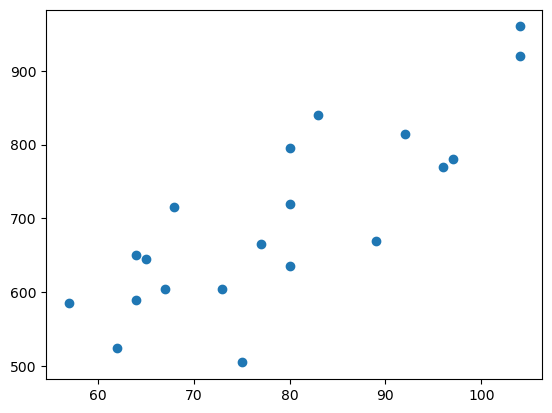

In [28]:
plt.plot(toefl_toeic["TOEFL"],toefl_toeic["TOEIC"],"o")
plt.show()

In [29]:
toefl_to_toeic = LinearRegression()
toefl_to_toeic.fit(toefl_toeic["TOEFL"].values.reshape(-1,1), toefl_toeic["TOEIC"])

LinearRegression()

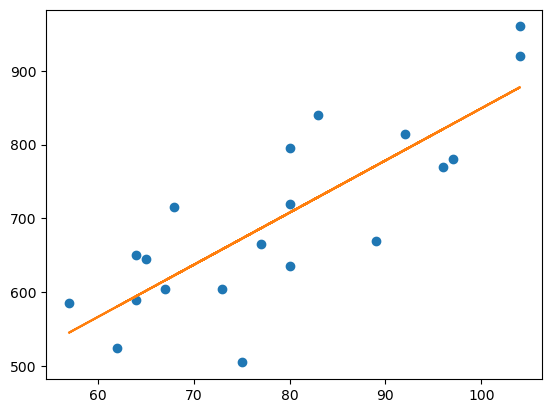

In [30]:
plt.plot(toefl_toeic["TOEFL"],toefl_toeic["TOEIC"], 'o')
plt.plot(toefl_toeic["TOEFL"],toefl_to_toeic.predict(toefl_toeic["TOEFL"].values.reshape(-1,1)))
plt.show()

In [31]:
# 추세선의 기울기와 절편
print(toefl_to_toeic.coef_, toefl_to_toeic.intercept_)

[7.06950174] 142.31978769068644


**(b)** ⓒ 유의수준 5%에서 각 회귀식의 선형성이 있는지 가설검정을 수행하시오.

In [32]:
mod1 = statsmodels.formula.api.ols('TOEIC ~ TOEFL', data=toefl_toeic)
reg_result1 = mod1.fit()
print(reg_result1.summary())

                            OLS Regression Results                            
Dep. Variable:                  TOEIC   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     35.27
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           1.28e-05
Time:                        16:05:37   Log-Likelihood:                -113.47
No. Observations:                  20   AIC:                             230.9
Df Residuals:                      18   BIC:                             232.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    142.3198     95.318      1.493      0.1

## **4-2.**
(통계학입문(3판) 582쪽 19번 변형) 미국 어느 지역의 자동차 판매대수와 광고비, 자동차 전문세일즈맨수, 판매 대리점의 위치 등에 대하여 조사한 자료를 분석하고자 합니다.

ⓒ 파이썬 sklearn.linear_model의 LinearRegression 패키지를 활용하여, Akaike information criterion을 기준으로 아래 모델 중 가장 우수한 모델을 선택하시오.

In [33]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
path = '/Users/younyung.gene/__DSL__/정기세션/[7:6] 학술 OT/기초과제1/elementary1_dataset/car_sell.dat'
df = pd.read_csv(path, encoding='utf-16', sep='\t')
df.drop(columns=['Unnamed: 4', 'Unnamed: 5'], inplace=True)
df['도시지역'].replace(to_replace=["No", "Yes"], value=[0,1], inplace = True)
df


,자동차 판매매수,광고시간(분),세일즈맨(명),도시지역
0,127,18,10,1
1,138,15,25,0
2,159,22,14,1
3,144,23,12,1
4,139,17,12,0
5,128,16,12,1
6,161,25,14,1
7,180,26,17,1
8,102,15,7,0
9,163,24,16,1


In [35]:
criteria = { 'a' : ['자동차 판매매수','광고시간(분)', '세일즈맨(명)', '도시지역'],
             'b' : ['자동차 판매매수',"광고시간(분)", '세일즈맨(명)'],
             'c' : ['자동차 판매매수','광고시간(분)', '도시지역'],
             'd' : ['자동차 판매매수','세일즈맨(명)', '도시지역'],
             'e' : ['자동차 판매매수','광고시간(분)'],
             'f' : ['자동차 판매매수',"세일즈맨(명)"]}

aic = {}


In [36]:
import statsmodels.api as sm

for version in criteria:
    data = df[criteria[version]]
    x, y = df[criteria[version][1:]], df[criteria[version][0]]
    x = sm.add_constant(x)

    mod1 = statsmodels.formula.api.ols('y ~ x', data=df)
    reg_result = mod1.fit()
    model_aic = reg_result.aic

    aic[version] = model_aic
    

In [37]:
for version in aic:
    print(f"model_{version} AIC : {aic[version]}")

model_a AIC : 91.64064145209734
model_b AIC : 91.52200938155832
model_c AIC : 101.52503182295261
model_d AIC : 100.43474223707223
model_e AIC : 99.80853349050341
model_f AIC : 108.81406913476984


(4-2) 광고시간, 세일즈맨을 독립변수로 취하는 model_b의 AIC가 제일 낮으므로, AIC 기준으로 model_b가 가장 좋은 성능을 보인다고 결론지었습니다.

(코드를 작성해주세요)
